# Assumptions of Linear Regression

The assumptions of linear regression include:

**1. Linearity:** The relationship between the dependent variable and independent variable(s) is linear.<br><br>
**2. Independence:** The observations are independent of each other.<br><br>
**3. Normality:** The errors are normally distributed.  errors = ypred - yactual<br><br> 
**4. No multicollinearity:** The independent variables are not highly correlated with each other.<br><br>
**5. No outliers:** There are no extreme or influential observations that have a large impact on the regression results.<br><br>
**6. Homoscedasticity:** The variance of the errors is constant across all levels of the independent variable(s). just no patterns<br><br>
**7. No autocorrelation:** The errors terms observations are independant of each other and are not correlated with each other. Means you miss some variables in the dataset

<br>Violations of these assumptions can lead to biased or inefficient estimates of the regression coefficients, and may affect the reliability and validity of the results. It is important to assess these assumptions before interpreting the results of a linear regression analysis.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

## Homoscedasticity

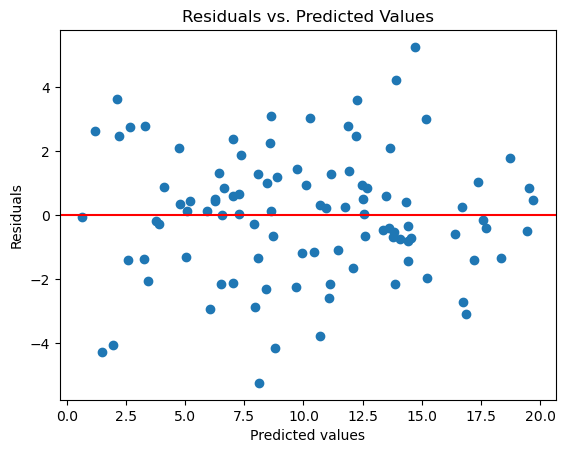

In [11]:
# Generate random data
np.random.seed(123)
X = np.random.rand(100, 1) * 10
# This simulates a situation where the spread of the residuals increases as the value of the independent variable increases.
y = 2*X + np.random.randn(100, 1) * 2

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions and calculate residuals
y_pred = model.predict(X)
residuals = y - y_pred

# Plot residuals against predicted values
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


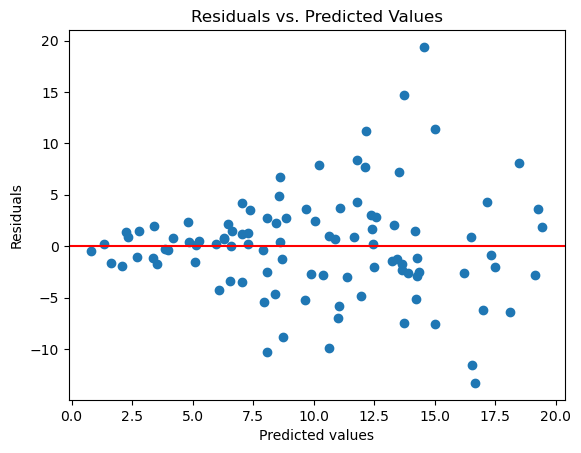

In [10]:
# Generate random data with heteroscedasticity
np.random.seed(123)
X = np.random.rand(100, 1) * 10
y = 2*X + np.random.randn(100, 1) * X

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions and calculate residuals
y_pred = model.predict(X)
residuals = y - y_pred

# Plot residuals against predicted values
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


## Normality

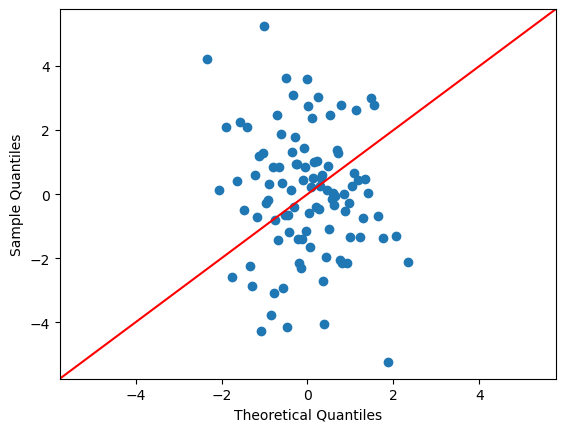

In [15]:
# Plot QQ plot of residuals
fig = sm.qqplot(residuals, line='45')
plt.show()

In [19]:
import scipy.stats as stats
import matplotlib.pyplot as plt

# Perform Shapiro-Wilk test for normality
shapiro_test = stats.shapiro(residuals)

print('Shapiro-Wilk test statistic:', shapiro_test.statistic)

Shapiro-Wilk test statistic: 0.9938569664955139


The **Shapiro-Wilk test** is a statistical test for normality. The test statistic ranges from 0 to 1, with values closer to 1 indicating normality.

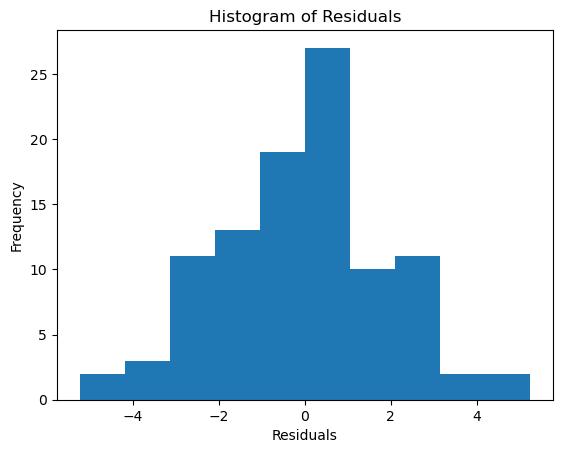

In [16]:
# Plot histogram of residuals
plt.hist(residuals, bins=10)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

## Autocorrelation

In [21]:
import pandas as pd
import numpy as np

# Create first variable
X1 = np.arange(5, 51, 5)

# Create second variable which is a lag of the first variable
X2 = pd.Series(X1).shift(1)

# Create data frame
df = pd.DataFrame({'X1': X1, 'X2': X2})

print(df)


   X1    X2
0   5   NaN
1  10   5.0
2  15  10.0
3  20  15.0
4  25  20.0
5  30  25.0
6  35  30.0
7  40  35.0
8  45  40.0
9  50  45.0


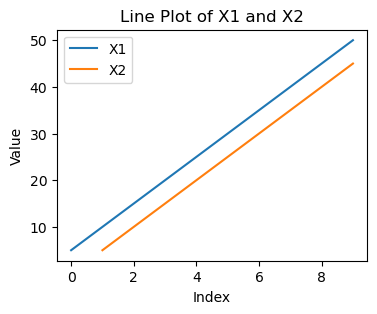

In [20]:
# Create a line plot for Var1 and Var2
df.plot(kind='line', y=['X1', 'X2'], figsize=(4, 3))

# Add axis labels and a title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Line Plot of X1 and X2')

# Show the plot
plt.show()

In [14]:
import statsmodels.api as sm

# Generate random data
np.random.seed(123)
X = np.random.rand(100, 1) * 10
# This simulates a situation where the spread of the residuals increases as the value of the independent variable increases.
y = 2*X + np.random.randn(100, 1) * 2

# Fit linear regression moadel
model = LinearRegression()
model.fit(X, y)

# Make predictions and calculate residuals
y_pred = model.predict(X)
residuals = y - y_pred

# Perform Durbin-Watson test for autocorrelation
dw_test = sm.stats.stattools.durbin_watson(residuals)

print('Durbin-Watson test statistic:', dw_test)

Durbin-Watson test statistic: [1.85131397]


The **Durbin-Watson test** is a statistical test for the presence of autocorrelation in the residuals of a regression model. The test statistic ranges from 0 to 4, with a value of 2 indicating no autocorrelation. A value less than 2 suggests positive autocorrelation, while a value greater than 2 suggests negative autocorrelation.

In this example, if the Durbin-Watson test statistic is close to 2, it suggests that there is no autocorrelation in the residuals of the linear regression model. However, if the test statistic is significantly different from 2, it suggests that there may be autocorrelation present, and further investigation may be necessary to account for this dependence.

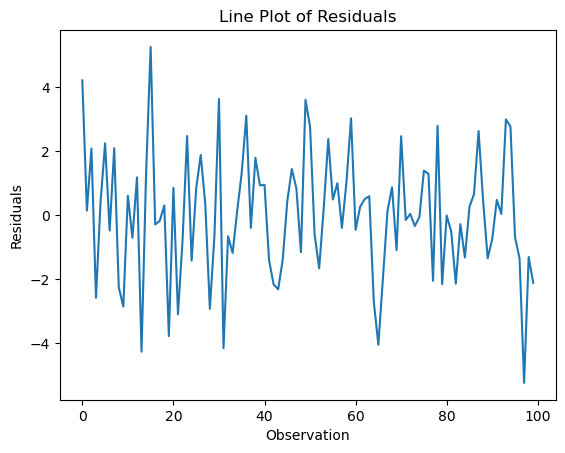

In [20]:
# Plot line plot of residuals
plt.plot(residuals)
plt.title('Line Plot of Residuals')
plt.xlabel('Observation')
plt.ylabel('Residuals')
plt.show()

### Check whether the assumptions of Linear Regression hold true on the data below

In [3]:
# Load the data
df = pd.read_csv('final.csv')
df.head()

,price,year_sold,property_tax,insurance,beds,baths,sqft,year_built,lot_size,basement,popular,recession,property_age,property_type_Condo
0,295850,2013,234,81,1,1,584,2013,0,0,0,1,0,1
1,216500,2006,169,51,1,1,612,1965,0,1,0,0,41,1
2,279900,2012,216,74,1,1,615,1963,0,0,0,1,49,1
3,379900,2005,265,92,1,1,618,2000,33541,0,0,0,5,1
4,340000,2002,88,30,1,1,634,1992,0,0,0,0,10,1


In [5]:
df.shape

(1863, 37)

In [4]:
df.corr(method='pearson')

,price,year_sold,property_tax,insurance,beds,baths,sqft,year_built,lot_size,basement,popular,recession,property_age,property_type_Condo
price,1.000000,0.110680,0.558266,0.554583,0.387682,0.398615,0.486858,0.034159,0.185244,0.109144,-0.148108,-0.022207,-0.005428,-0.322641
year_sold,0.110680,1.000000,-0.265243,-0.261875,-0.174329,-0.132903,-0.241073,-0.041976,-0.082122,-0.067985,0.068862,0.509384,0.287097,0.136561
property_tax,0.558266,-0.265243,1.000000,0.983430,0.544898,0.507861,0.640393,-0.080934,0.218076,0.182701,-0.208959,-0.121395,0.012119,-0.449372
insurance,0.554583,-0.261875,0.983430,1.000000,0.479399,0.454178,0.569497,-0.145710,0.188731,0.135135,-0.173812,-0.120809,0.075054,-0.410135
beds,0.387682,-0.174329,0.544898,0.479399,1.000000,0.640168,0.688634,-0.028209,0.228757,0.413082,-0.430083,-0.070744,-0.015989,-0.658729
baths,0.398615,-0.132903,0.507861,0.454178,0.640168,1.000000,0.669070,0.188456,0.186494,0.344052,-0.197480,-0.057730,-0.213489,-0.339109
sqft,0.486858,-0.241073,0.640393,0.569497,0.688634,0.669070,1.000000,0.234882,0.325832,0.270175,-0.270799,-0.078903,-0.284702,-0.525699
year_built,0.034159,-0.041976,-0.080934,-0.145710,-0.028209,0.188456,0.234882,1.000000,0.022900,0.001779,0.105150,0.029828,-0.969108,0.269514
lot_size,0.185244,-0.082122,0.218076,0.188731,0.228757,0.186494,0.325832,0.022900,1.000000,0.061934,-0.092659,0.006077,-0.042227,-0.250534
basement,0.109144,-0.067985,0.182701,0.135135,0.413082,0.344052,0.270175,0.001779,0.061934,1.000000,-0.198936,-0.047486,-0.018488,-0.253299


In [5]:
df.corr(method='spearman')

,price,year_sold,property_tax,insurance,beds,baths,sqft,year_built,lot_size,basement,popular,recession,property_age,property_type_Condo
price,1.000000,0.082706,0.664269,0.682143,0.384512,0.381480,0.479641,0.083829,0.361889,0.109188,-0.151401,-0.025314,-0.047573,-0.319219
year_sold,0.082706,1.000000,-0.244339,-0.237569,-0.150122,-0.123193,-0.212703,-0.042393,-0.138144,-0.063772,0.058612,0.548328,0.311642,0.103475
property_tax,0.664269,-0.244339,1.000000,0.975799,0.667372,0.576326,0.747477,-0.017385,0.615702,0.253744,-0.268862,-0.115491,-0.074713,-0.574603
insurance,0.682143,-0.237569,0.975799,1.000000,0.595334,0.517118,0.662822,-0.082199,0.567621,0.201812,-0.220884,-0.112937,-0.008354,-0.534865
beds,0.384512,-0.150122,0.667372,0.595334,1.000000,0.626041,0.751368,-0.030707,0.711681,0.382784,-0.445728,-0.079423,-0.039579,-0.681213
baths,0.381480,-0.123193,0.576326,0.517118,0.626041,1.000000,0.678541,0.192458,0.408724,0.349440,-0.237726,-0.062920,-0.231146,-0.338446
sqft,0.479641,-0.212703,0.747477,0.662822,0.751368,0.678541,1.000000,0.228703,0.612723,0.330198,-0.351051,-0.073354,-0.303402,-0.557619
year_built,0.083829,-0.042393,-0.017385,-0.082199,-0.030707,0.192458,0.228703,1.000000,-0.206274,-0.035754,0.112083,0.038001,-0.951505,0.246016
lot_size,0.361889,-0.138144,0.615702,0.567621,0.711681,0.408724,0.612723,-0.206274,1.000000,0.300714,-0.382913,-0.065509,0.131563,-0.783132
basement,0.109188,-0.063772,0.253744,0.201812,0.382784,0.349440,0.330198,-0.035754,0.300714,1.000000,-0.198936,-0.047486,0.001216,-0.253299


## Linear Regression Model

In [3]:
# import linear regression model
from sklearn.linear_model import LinearRegression

In [4]:
# seperate input features in x

# store the target variable in y


**Train Test Split**
* Training sets are used to fit and tune your models.
* Test sets are put aside as "unseen" data to evaluate your models.
* The `train_test_split()` function splits data into randomized subsets.

In [5]:
# import module

# Split the dataset


In [7]:
# train your model

# make preditions on train set

# get the residuals

In [21]:
# make predictions on test set

# get the residuals